# 独联体区海关数据分析

此项目的是向独联体国家出口的中国客车海关数据的分析。分析期间为2016年之2021年。此分析有下面的几个部分：

<a href='#1'> 1. 数据准备以及调节 </a>

<a href='#2'>2. 数据报告以及显象</a>

<a href='#3'>3. 总结</a>

<a id='1'></a> 
 ### 1.  数据准备以及调节

In [2]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#list of columns we need
columns_list = ['日期',
               '目的国',
               '商品编码','商品名称', '品牌', '型号', '座位数', '排量',
               '贸易方式','成交方式','运输方式', '经营单位',
               '单价', '币制', '数量', '总价'] 

In [4]:
#import the first dataset
df_2016 = pd.read_excel('2016年1-12月海关出口原始数据.xlsx', sheet_name='总')

#remove the unnecessary columns
df_2016 = df_2016.drop(['进出口',
                        '企业代码','企业地址','电话','传真','邮编','电子邮件','联系人','企业性质',
                        '所属地区', '口岸',
                        '途经国', '单位',
                        '人民币金额','人民币单价', '最惠／普标记', '船舶吨税优普标记',
                        '产销经济区域', '产销洲', '产销地理区域', '省市', '地区', '成交方式说明', '年份'
                       ], axis=1)

#add columns
missing_columns_2016 = ['座位数', '排量', '经营单位','型号']
df_2016 = df_2016.reindex(columns=[*df_2016.columns.tolist(), *missing_columns_2016])

#change column names
df_2016.rename(columns={'企业名称': '品牌', '原产目的国':'目的国', '金额':'总价'}, inplace=True)

#change data type
df_2016['日期'] =  pd.to_datetime(df_2016['日期'], format='%Y%m').dt.to_period('M')

#put the columns in the right order
df_2016 = df_2016[columns_list]

In [5]:
#import the second dataset
df_2017 = pd.read_excel('2017年1-12月海关出口原始数据-8位码.xlsx', sheet_name='总')

#remove the unnecessary columns
df_2017 = df_2017.drop(['进出口',
                        '企业代码','企业地址','电话','传真','邮编','电子邮件','联系人','企业性质',
                        '所属地区', '口岸',
                        '途经国', '单位',
                        '人民币金额','人民币单价', '最惠／普标记', '船舶吨税优普标记',
                        '产销经济区域', '产销洲', '产销地理区域', '省市', '地区', '成交方式说明', '年份'
                       ], axis=1)
#add columns
missing_columns_2017 = ['座位数', '排量', '经营单位','型号']
df_2017 = df_2017.reindex(columns=[*df_2017.columns.tolist(), *missing_columns_2017])

#change column names
df_2017.rename(columns={'企业名称': '品牌', '原产目的国':'目的国', '金额':'总价'}, inplace=True)

#change data type
df_2017['日期'] =  pd.to_datetime(df_2017['日期'], format='%Y%m').dt.to_period('M')

#put the columns in the right order
df_2017 = df_2017[columns_list]

In [6]:
#import the third dataset
df_2018 = pd.read_excel('2018年1-12月海关出口原始数据（10位）.xlsx', sheet_name='原始数据（去掉旧车）')

#remove the unnecessary columns
df_2018 = df_2018.drop(['进出口',
                        '出口关区','主管关区','附加码','产品名称','车长',
                        '货主单位','经营单位编码','申报单位',
                        '原产地','目的港','中转国',
                        '包装种类','企业性质','数量单位','法定总量','法定单位'                
                       ], axis=1)

#change column names
df_2018.rename(columns={'规格型号': '商品名称', '美元单价':'单价', '美元币制':'币制','申报数量':'数量','美元总额':'总价'}, inplace=True)

#change data type
df_2018['日期'] = df_2018['日期'].dt.to_period('M')

#put the columns in the right order
df_2018 = df_2018[columns_list]

In [7]:
#import the forth dataset
df_2019 = pd.read_excel('2019年1-12月海关出口原始数据（10位）.xlsx', sheet_name='数据处理（全部，不含旧车）')

#remove the unnecessary columns
df_2019 = df_2019.drop(['进出口','年份','月份',
                        '出口关区','主管关区','附加码','产品名称','车长',
                        '货主单位','经营单位编码','申报单位',
                        '经济洲','地理洲','原产地','目的港','中转国',
                        '申报单价','申报总价','申报币制',
                        '包装种类','数量单位','法定总量','法定单位'                
                       ], axis=1)

#change column names
df_2019.rename(columns={'规格型号': '商品名称', 'FOB美元单价':'单价', 'FOB美元币制':'币制','申报数量':'数量','FOB美元总额':'总价'}, inplace=True)

#change data type
df_2019['日期'] = df_2019['日期'].dt.to_period('M')

#put the columns in the right order
df_2019 = df_2019[columns_list]

In [8]:
#import the fifth dataset
df_2020 = pd.read_excel('2020年1-12月海关数据分析（8位码）.xlsx', sheet_name='原始明细（1-12月）')

#remove the unnecessary columns
df_2020 = df_2020.drop(['进出口','按发动机','二手车',
                        '海关编码描述','产销经济区','产销州','产销地里区','大区','法定单位','车型'                
                       ], axis=1)

#add columns
missing_columns_2020 = [ '排量','运输方式','型号','经营单位']
df_2020 = df_2020.reindex(columns=[*df_2020.columns.tolist(), *missing_columns_2020])

#change column names
df_2020.rename(columns={'原产地': '品牌', '美元':'总价', '法定数量':'数量'}, inplace=True)

#change data type
df_2020['日期'] = df_2020['日期'].str[:6]
df_2020['日期'] =  pd.to_datetime(df_2020['日期'], format='%Y%m').dt.to_period('M')

#put the columns in the right order
df_2020 = df_2020[columns_list]

In [9]:
#import the sixth dataset
df_2021 = pd.read_excel('2021年1-7月.海关数据分析（独联体区划分到欧洲大区）.xlsx', sheet_name='原始数据')

#remove the unnecessary columns
df_2021 = df_2021.drop(['进出口','按发动机','二手车',
                        '海关编码描述','产销经济区','产销州','产销地里区','大区','法定单位','车型',
                        '所属区域', '所属大区','Unnamed: 24'
                       ], axis=1)
#add columns
missing_columns_2021 = [ '排量','运输方式','型号','经营单位']
df_2021 = df_2021.reindex(columns=[*df_2021.columns.tolist(), *missing_columns_2021])

#change column names
df_2021.rename(columns={'原产地': '品牌', '美元':'总价', '法定数量':'数量'}, inplace=True)

#change data type
df_2021['日期'] =  pd.to_datetime(df_2021['日期'], format='%Y%m').dt.to_period('M')

#put the columns in the right order
df_2021 = df_2021[columns_list]

In [10]:
#merging dataframes
df_total = pd.concat([df_2016,df_2017,df_2018,df_2019,df_2020,df_2021])

In [11]:
#exctract data for CIS countries
df_CIS = df_total[(df_total['目的国'] == '哈萨克斯坦')
                 |(df_total['目的国'] == '乌兹别克斯坦')
                 |(df_total['目的国'] == '吉尔吉斯斯坦')
                 |(df_total['目的国'] == '塔吉克斯坦')
                 |(df_total['目的国'] == '土库曼斯坦')
                 |(df_total['目的国'] == '亚美尼亚')
                 |(df_total['目的国'] == '格鲁吉亚')
                 |(df_total['目的国'] == '乌克兰')
                 |(df_total['目的国'] == '摩尔多瓦')
                 |(df_total['目的国'] == '阿塞拜疆')]

#replace 品牌 values
brand_dict = {'郑州宇通客车股份有限公司':'宇通',
              '厦门金龙旅行车有限公司':'金龙',
              '北京福田国际贸易有限公司':'福田',
              '北汽福田汽车股份有限公司':'福田',
              '金龙联合汽车工业(苏州)有限公司':'海格',
              '河南少林客车股份有限公司':'少林',
              '安徽江淮汽车股份有限公司':'江淮',
              '厦门金龙联合汽车工业有限公司':'金龙',
              '厦门金龙联合汽车工业有限公司':'金龙',
              '长城汽车股份有限公司':'长城',
              '重庆长安汽车国际销售服务有限公司':'长安',
              '江苏九龙汽车制造有限公司':'九龙',
              '乌鲁木齐新禧新盛国际贸易有限公司':'二手车',
              '新疆正和经贸有限公司':'二手车',
              '新疆鑫纪元商贸有限公司':'二手车',
              "'50122604E3":'二手车',
              '乌鲁木齐美之美贸易有限公司':'二手车',
              '中国路桥工程有限责任公司':'二手车',
              '重庆邦龙进出口贸易有限公司':'二手车',
              '聊城市汇大进出口有限责任公司':'二手车'
             }

for key in brand_dict.keys():
    df_CIS['品牌'] = df_CIS['品牌'].replace(key, brand_dict[key])

#replace missing values in date
df_CIS['日期'] = df_CIS['日期'].fillna('2020-01')

#check the currency
display(df_CIS['币制'].value_counts())

<ipython-input-11-41a7cca6a46e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CIS['品牌'] = df_CIS['品牌'].replace(key, brand_dict[key])
<ipython-input-11-41a7cca6a46e>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CIS['日期'] = df_CIS['日期'].fillna('2020-01')


美元    1554
Name: 币制, dtype: int64

在这一个部分我们上载了2016-2021年的海关数据信息以及把这几年数据合并在一个数据库了。因为每年的数据格式都不一样，所以我们单独整理了每一个年的数据。我们分析一些`品牌`就发现总价很低，所以把这种数据合并在`二手车`了。我们还发现2020年数据缺少日期数据，所以为了不影响未来的分析，填写了`2020-01`。我们还检查了`币制`规格，确认只用`美元`。结果我们有1554个数值，16参数的数据库。

<a id='2'></a> 
 ### 2.  数据报告以及显象

<ipython-input-12-29de5e4bdfaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CIS['year'] = df_CIS['日期'].dt.year
<ipython-input-12-29de5e4bdfaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CIS['month'] = df_CIS['日期'].dt.month


[Text(0.5, 1.0, 'Monthly sales volumes, millions USD')]

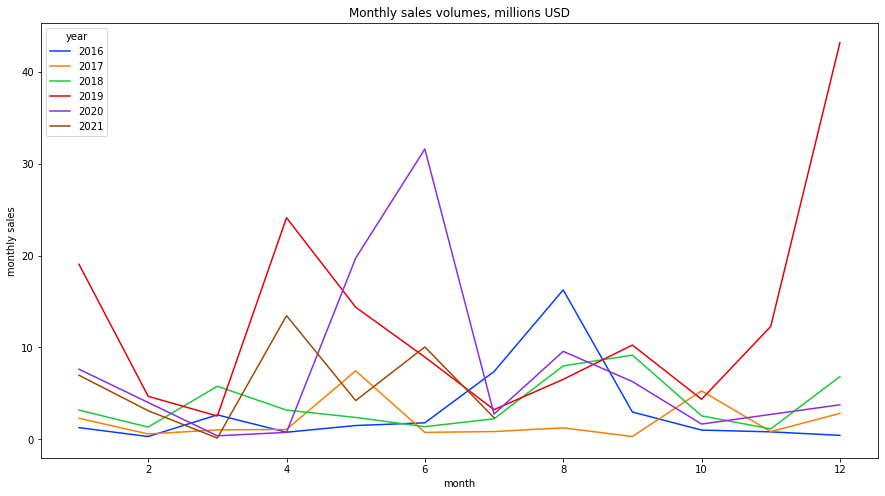

In [12]:
#plot historical data
df_CIS['year'] = df_CIS['日期'].dt.year
df_CIS['month'] = df_CIS['日期'].dt.month

df_CIS_grouped = df_CIS.groupby(['year','month'])['总价'].sum().reset_index()
df_CIS_grouped.columns = ['year', 'month', 'monthly sales']
df_CIS_grouped['monthly sales'] = df_CIS_grouped['monthly sales'] / 1000000

plt.figure(figsize=(15,8))
sns.lineplot(x='month',y='monthly sales',hue='year', palette='bright', data=df_CIS_grouped).set(title='Monthly sales volumes, millions USD')


,year,总价
0,2016,37.13
1,2017,24.47
2,2018,47.10
3,2019,153.60
4,2020,84.14
5,2021,40.31


[Text(0.5, 1.0, 'Yearly sales volumes, mln USD')]

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24635 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0, flags=flags)


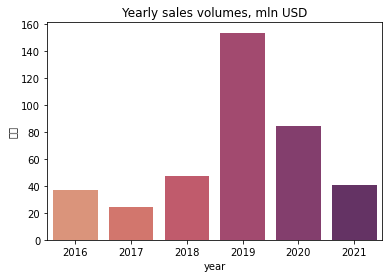

In [13]:
#plot yearly data
df_CIS_grouped_by_year = df_CIS.groupby(['year'])['总价'].sum().reset_index()
df_CIS_grouped_by_year['总价'] = (df_CIS_grouped_by_year['总价'] / 1000000).round(2)
display(df_CIS_grouped_by_year)
sns.barplot(x='year',y='总价', data=df_CIS_grouped_by_year, palette='flare').set(title='Yearly sales volumes, mln USD')

In [14]:
#export file for Tableau
df_CIS_2021 = df_CIS[df_CIS['year'] == 2021]
df_CIS_2021.to_excel('df_CIS_2021.xls')

<ipython-input-14-748322aad029>:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_CIS_2021.to_excel('df_CIS_2021.xls')


In [15]:
#pivot table by producers
print("Sales in 2021 by producers, USD")
print("-------------------------------")
display(df_CIS_2021.pivot_table(index=['目的国','品牌'], values = ['总价','数量'], aggfunc='sum')
       .reset_index()
       .sort_values(['目的国','总价'], ascending=[True, False])
       .set_index(['目的国','品牌']))


Sales in 2021 by producers, USD
-------------------------------


总价   数量
目的国    品牌                        
乌克兰    河南省        1379830.00   13
       安徽省          35800.00    2
乌兹别克斯坦 安徽省        1305500.00   45
       河南省         262851.00    3
       江苏省         253600.00    5
       山东省         220000.00    2
       福建省          85432.00    1
       北京市          27586.00    3
       江西省          14711.00    1
       重庆市          12000.00    1
亚美尼亚   安徽省          71700.00    5
吉尔吉斯斯坦 安徽省          21000.00    1
哈萨克斯坦  河南省       21060556.00  256
       新疆维吾尔自治区   1334054.00   28
       安徽省         839798.00   49
       北京市         531467.00   15
       江苏省         336000.00    4
       广西壮族自治区     251764.00    1
       山东省          64640.00    5
       福建省          35603.00    1
       四川省          15386.00    5
       广东省           4886.00    3
       浙江省           3000.00    2
土库曼斯坦  新疆维吾尔自治区   1663676.00   20
       湖南省          63226.00    1
塔吉克斯坦  福建省       10151288.82  155
       北京市         122908.00    2
       江苏省          49513.00    1
格鲁吉亚   安徽省          87268.00    5

In [16]:
#pivot table by products
print("Sales in 2021 by products, USD")
print("-------------------------------")
display(df_CIS_2021.pivot_table(index=['目的国','商品名称'], values = ['总价','数量'], aggfunc='sum')
       .reset_index()
       .sort_values(['目的国','总价'], ascending=[True, False])
       .set_index(['目的国','商品名称']))

Sales in 2021 by products, USD
-------------------------------


总价   数量
目的国    商品名称                                        
乌克兰    其他大型客车,≥30座                  1141690.00   11
       仅装有压燃式活塞内燃发动机的大型客车,≥30座       238140.00    2
       仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19     35800.00    2
乌兹别克斯坦 其他大型客车,≥30座                  1350551.00   22
       其他机动客车,20≤座≤29                417600.00   22
       仅装有压燃式活塞内燃发动机的大型客车,≥30座       238702.00    4
       其他机动客车,10≤座≤19                174827.00   13
亚美尼亚   仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19     71700.00    5
吉尔吉斯斯坦 仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29     21000.00    1
哈萨克斯坦  仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29  10691426.00  154
       仅装有压燃式活塞内燃发动机的大型客车,≥30座     10193127.00  134
       其他机动客车,20≤座≤29               2060845.00   28
       其他机动客车,10≤座≤19                800845.00   43
       仅装有驱动电动机的大型客车,30座及以上          251764.00    1
       仅装有驱动电动机的机动客车,20≤座≤29         244365.00    1
       仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19    125921.00    7
       其他大型客车,≥30座                   108861.00    1
土库曼斯坦  仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29   1663676.00   20
       仅装有压燃式活塞内燃发动机的大型客车,≥30座        63226.00    1
塔吉克斯坦  仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29   6179360.49  105
       仅装有压燃式活塞内燃发动机的大型客车,≥30座      3971928.33   50
       仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19    172421.00    3
格鲁吉亚   仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29     52768.00    2
       其他机动客车,10≤座≤19                 34500.00    3

In [17]:
#total pivot table
print("Sales in 2021 by producers and products, USD")
print("-------------------------------")
display(df_CIS_2021.pivot_table(index=['目的国','品牌','商品名称'], values = ['总价','数量'], aggfunc='sum'))

Sales in 2021 by producers and products, USD
-------------------------------


总价   数量
目的国    品牌       商品名称                                       
乌克兰    安徽省      仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19    35800.00    2
       河南省      仅装有压燃式活塞内燃发动机的大型客车,≥30座      238140.00    2
                其他大型客车,≥30座                 1141690.00   11
乌兹别克斯坦 北京市      仅装有压燃式活塞内燃发动机的大型客车,≥30座         870.00    1
                其他机动客车,10≤座≤19                26716.00    2
       安徽省      其他大型客车,≥30座                  787500.00   15
                其他机动客车,10≤座≤19               100400.00    8
                其他机动客车,20≤座≤29               417600.00   22
       山东省      仅装有压燃式活塞内燃发动机的大型客车,≥30座      107500.00    1
                其他大型客车,≥30座                  112500.00    1
       江苏省      仅装有压燃式活塞内燃发动机的大型客车,≥30座       44900.00    1
                其他大型客车,≥30座                  187700.00    3
                其他机动客车,10≤座≤19                21000.00    1
       江西省      其他机动客车,10≤座≤19                14711.00    1
       河南省      其他大型客车,≥30座                  262851.00    3
       福建省      仅装有压燃式活塞内燃发动机的大型客车,≥30座       85432.00    1
       重庆市      其他机动客车,10≤座≤19                12000.00    1
亚美尼亚   安徽省      仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19    71700.00    5
吉尔吉斯斯坦 安徽省      仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29    21000.00    1
哈萨克斯坦  北京市      仅装有压燃式活塞内燃发动机的大型客车,≥30座      531467.00   15
       四川省      仅装有压燃式活塞内燃发动机的大型客车,≥30座       15386.00    5
       安徽省      仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19   125921.00    7
                其他机动客车,10≤座≤19               713877.00   42
       山东省      仅装有压燃式活塞内燃发动机的大型客车,≥30座       13640.00    4
                仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29    51000.00    1
       广东省      仅装有压燃式活塞内燃发动机的大型客车,≥30座        4886.00    3
       广西壮族自治区  仅装有驱动电动机的大型客车,30座及以上         251764.00    1
       新疆维吾尔自治区 仅装有压燃式活塞内燃发动机的大型客车,≥30座      189100.00    3
                仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29  1144954.00   25
       江苏省      仅装有压燃式活塞内燃发动机的大型客车,≥30座      336000.00    4
       河南省      仅装有压燃式活塞内燃发动机的大型客车,≥30座     9064045.00   97
                仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29  9495472.00  128
                仅装有驱动电动机的机动客车,20≤座≤29        244365.00    1
                其他大型客车,≥30座                  108861.00    1
                其他机动客车,10≤座≤19                86968.00    1
                其他机动客车,20≤座≤29              2060845.00   28
       浙江省      仅装有压燃式活塞内燃发动机的大型客车,≥30座        3000.00    2
       福建省      仅装有压燃式活塞内燃发动机的大型客车,≥30座       35603.00    1
土库曼斯坦  新疆维吾尔自治区 仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29  1663676.00   20
       湖南省      仅装有压燃式活塞内燃发动机的大型客车,≥30座       63226.00    1
塔吉克斯坦  北京市      仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19   122908.00    2
       江苏省      仅装有压燃式活塞内燃发动机的机动客车,10≤座≤19    49513.00    1
       福建省      仅装有压燃式活塞内燃发动机的大型客车,≥30座     3971928.33   50
                仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29  6179360.49  105
格鲁吉亚   安徽省      仅装有压燃式活塞内燃发动机的机动客车,20≤座≤29    52768.00    2
                其他机动客车,10≤座≤19                34500.00    3

在此部分我们整理了海关数据。首先，我们研究了独联体区2016之2021年出口量的变动以及研究了每个月的进程。后面我们只观察2021年的数据，分开汇总每个国家按厂家和每个国家按商品的出口量信息。

<a id='3'></a> 
 ### 3.  总结

上面我们拿了中国客车出口海关数据进行了初步数据整理和分析。分析的结果可以直接用在年度报告里或者进一步用Tableau制作Dashboard.